   # The Sparks Foundation

## Graduate Rotational Internship Program (GRIP) 

### DECEMBER 2022 Batch

# Candidate Name : Abdul Jaweed

# Task 7 : Stock Market Prediction 

#### Objective of the Task is to Create a Hybrid Model for Stock Price/ Performance Prediction Using Numerical Analysis of Historical Stock Prices and Sentimantal Analysis of News Headlines

In [1]:
# importing libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

from statsmodels.tsa.stattools import adfuller, acf, pacf
from scipy.stats import norm
import statsmodels.api as sm
from statsmodels.tsa.statespace.sarimax import SARIMAX

#Importing libraries required for TEXTUAL ANALYSIS.

from textblob import TextBlob
from nltk.sentiment.vader import SentimentIntensityAnalyzer

#Importing Libraries required for NUMERICAL ANALYSIS.

from statsmodels.tsa.arima_model import ARIMA
from statsmodels.tsa.statespace.sarimax import SARIMAX
from statsmodels.tsa.stattools import adfuller

#Importing Libraries required for PREDICTION

from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

In [2]:
# Download the dataset from the given links.

import pandas_datareader.data as pdr
df=pdr.DataReader('^BSESN','yahoo',start='2015-01-01', end='2022-12-15')

In [3]:
df.head()

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2015-01-02,27937.470703,27519.259766,27521.279297,27887.900391,7400.0,27887.900391
2015-01-05,28064.490234,27786.849609,27978.429688,27842.320312,9200.0,27842.320312
2015-01-06,27698.929688,26937.060547,27694.230469,26987.460938,14100.0,26987.460938
2015-01-07,27051.599609,26776.119141,26983.429688,26908.820312,12200.0,26908.820312
2015-01-08,27316.410156,27101.939453,27178.769531,27274.710938,8200.0,27274.710938


In [4]:
df.tail()

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2022-12-09,62735.421875,61889.109375,62690.859375,62181.671875,7300.0,62181.671875
2022-12-12,62239.421875,61676.148438,61770.558594,62130.570312,7000.0,62130.570312
2022-12-13,62567.921875,62129.570312,62300.671875,62533.300781,12000.0,62533.300781
2022-12-14,62835.109375,62591.281250,62685.941406,62677.910156,5700.0,62677.910156
2022-12-15,62624.808594,61715.609375,62530.070312,61799.031250,5600.0,61799.031250


In [5]:
df.sample(6)

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2020-01-20,42273.871094,41503.371094,42263.000000,41528.910156,7500.0,41528.910156
2020-03-03,38754.238281,38142.300781,38480.890625,38623.699219,10600.0,38623.699219
2018-08-13,37799.539062,37559.261719,37693.191406,37644.898438,11400.0,37644.898438
2018-11-30,36389.218750,36082.968750,36304.429688,36194.300781,23300.0,36194.300781
2015-02-19,29522.859375,29108.150391,29434.910156,29462.269531,11900.0,29462.269531
2015-11-13,25724.089844,25540.730469,25724.089844,25610.529297,11500.0,25610.529297


In [6]:
#Converting this obtained file into CSV.

df.to_csv("stock_price.csv")

## Importing dataset

In [7]:
# importing stock price dataset

stock = pd.read_csv('stock_price.csv')

In [8]:
stock.head()

,Date,High,Low,Open,Close,Volume,Adj Close
0,2015-01-02,27937.470703,27519.259766,27521.279297,27887.900391,7400.0,27887.900391
1,2015-01-05,28064.490234,27786.849609,27978.429688,27842.320312,9200.0,27842.320312
2,2015-01-06,27698.929688,26937.060547,27694.230469,26987.460938,14100.0,26987.460938
3,2015-01-07,27051.599609,26776.119141,26983.429688,26908.820312,12200.0,26908.820312
4,2015-01-08,27316.410156,27101.939453,27178.769531,27274.710938,8200.0,27274.710938


In [9]:
# importing Indian news headlines dataset

news = pd.read_csv('india-news-headlines.csv')

In [10]:
news.head()

,publish_date,headline_category,headline_text
0,20010102,unknown,Status quo will not be disturbed at Ayodhya; s...
1,20010102,unknown,Fissures in Hurriyat over Pak visit
2,20010102,unknown,America's unwanted heading for India?
3,20010102,unknown,For bigwigs; it is destination Goa
4,20010102,unknown,Extra buses to clear tourist traffic


In [11]:
news.tail()

,publish_date,headline_category,headline_text
3650965,20220331,city.srinagar,J&K sacks 2 cops; 3 other employees over terro...
3650966,20220331,entertainment.hindi.bollywood,Ranbir Kapoor says 'Rishi Kapoor enjoyed his a...
3650967,20220331,city.trichy,As Covid-19 cases drop to nil in southern dist...
3650968,20220331,city.erode,Tamil Nadu sees marginal rise of Covid cases w...
3650969,20220331,city.salem,Tamil Nadu sees marginal rise of Covid cases w...


In [12]:
news.sample(6)

,publish_date,headline_category,headline_text
2916153,20180609,city.goa,Rs 15 crore rent due to CCP from 400 shops in ...
1512984,20121206,tech.social,Facebook Messenger opens to non-members
690840,20090213,city.pune,Non-teaching staff get a lesson in astronomy
154592,20021030,city.mumbai,ACB seeks police custody of Karnik
2547899,20161228,city.lucknow,Irked over poor arrangements; Lucknow Universi...
2148568,20150606,life-style.beauty,How to make natural lavender mask


## EDA

  **EDA ON STOCK PRICE DATASET**

In [13]:
stock.shape

(1958, 7)

In [14]:
# checking the information

stock.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1958 entries, 0 to 1957
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Date       1958 non-null   object 
 1   High       1958 non-null   float64
 2   Low        1958 non-null   float64
 3   Open       1958 non-null   float64
 4   Close      1958 non-null   float64
 5   Volume     1958 non-null   float64
 6   Adj Close  1958 non-null   float64
dtypes: float64(6), object(1)
memory usage: 107.2+ KB


In [15]:
# checking the missing values

stock.isnull().sum()

Date         0
High         0
Low          0
Open         0
Close        0
Volume       0
Adj Close    0
dtype: int64

In [16]:
# checking the duplicated values

stock.duplicated().sum()

0

In [17]:
# checking the statistical summary of the data

stock.describe()

,High,Low,Open,Close,Volume,Adj Close
count,1958.000000,1958.000000,1958.000000,1958.000000,1.958000e+03,1958.000000
mean,38634.890940,38178.314566,38446.976897,38404.888066,1.762398e+05,38404.888066
std,11204.551714,11082.567981,11147.433992,11152.488063,1.687081e+06,11152.488063
min,23142.960938,22494.609375,23060.390625,22951.830078,0.000000e+00,22951.830078
25%,28863.078125,28509.964355,28736.029785,28678.103027,9.300000e+03,28678.103027
50%,35839.054688,35494.445312,35736.935547,35691.060547,1.230000e+04,35691.060547
75%,47046.553711,46425.786133,46766.612305,46822.384766,1.750000e+04,46822.384766
max,63583.070312,63183.769531,63357.988281,63284.191406,3.181510e+07,63284.191406


In [18]:
# checking the correlation of the given data

stock.corr()

,High,Low,Open,Close,Volume,Adj Close
High,1.000000,0.999637,0.999798,0.999773,-0.020788,0.999773
Low,0.999637,1.000000,0.999715,0.999770,-0.020357,0.999770
Open,0.999798,0.999715,1.000000,0.999501,-0.020693,0.999501
Close,0.999773,0.999770,0.999501,1.000000,-0.020569,1.000000
Volume,-0.020788,-0.020357,-0.020693,-0.020569,1.000000,-0.020569
Adj Close,0.999773,0.999770,0.999501,1.000000,-0.020569,1.000000


  **EDA ON INDIAN NEWS HEADLINES DATASET**

In [19]:
news.shape

(3650970, 3)

In [20]:
# dropping the headline columns 


news.drop('headline_category', axis=1, inplace=True)

In [21]:
news.head()

,publish_date,headline_text
0,20010102,Status quo will not be disturbed at Ayodhya; s...
1,20010102,Fissures in Hurriyat over Pak visit
2,20010102,America's unwanted heading for India?
3,20010102,For bigwigs; it is destination Goa
4,20010102,Extra buses to clear tourist traffic


In [22]:
# Lets rename the column names of news dataset.

news.rename(columns={'publish_date':'Date','headline_text':'News'},inplace=True)

In [23]:
news.head()

,Date,News
0,20010102,Status quo will not be disturbed at Ayodhya; s...
1,20010102,Fissures in Hurriyat over Pak visit
2,20010102,America's unwanted heading for India?
3,20010102,For bigwigs; it is destination Goa
4,20010102,Extra buses to clear tourist traffic


In [24]:
news.tail()

,Date,News
3650965,20220331,J&K sacks 2 cops; 3 other employees over terro...
3650966,20220331,Ranbir Kapoor says 'Rishi Kapoor enjoyed his a...
3650967,20220331,As Covid-19 cases drop to nil in southern dist...
3650968,20220331,Tamil Nadu sees marginal rise of Covid cases w...
3650969,20220331,Tamil Nadu sees marginal rise of Covid cases w...


In [25]:
news.sample(6)

,Date,News
1899345,20140614,Get party ready in a jiffy
3613219,20220115,Tractor driver dies in freak accident at airport
121641,20020704,July rides high on blockbusters
2700834,20170804,Bangladesh TV's first-ever Feluda series starr...
3247504,20200113,Druggists allege harassment; call 3-day strike...
3023465,20181110,'Sarkar' agrees to cuts; government declares t...


In [26]:
news.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3650970 entries, 0 to 3650969
Data columns (total 2 columns):
 #   Column  Dtype 
---  ------  ----- 
 0   Date    int64 
 1   News    object
dtypes: int64(1), object(1)
memory usage: 55.7+ MB


In [27]:
news.isnull()

,Date,News
0,False,False
1,False,False
2,False,False
3,False,False
4,False,False
...,...,...
3650965,False,False
3650966,False,False
3650967,False,False
3650968,False,False


In [28]:
news.isnull().sum()

Date    0
News    0
dtype: int64

In [29]:
# converting dataframe 

news['Date'] = news['Date'].apply(str)

In [30]:
print(news['Date'].dtype)

object


In [31]:
print(stock['Date'].dtype)

object


In [32]:
# changing datetime

stock['Date'] = pd.to_datetime(stock['Date'])

In [33]:
stock.head()

,Date,High,Low,Open,Close,Volume,Adj Close
0,2015-01-02,27937.470703,27519.259766,27521.279297,27887.900391,7400.0,27887.900391
1,2015-01-05,28064.490234,27786.849609,27978.429688,27842.320312,9200.0,27842.320312
2,2015-01-06,27698.929688,26937.060547,27694.230469,26987.460938,14100.0,26987.460938
3,2015-01-07,27051.599609,26776.119141,26983.429688,26908.820312,12200.0,26908.820312
4,2015-01-08,27316.410156,27101.939453,27178.769531,27274.710938,8200.0,27274.710938


In [34]:
stock.tail()

,Date,High,Low,Open,Close,Volume,Adj Close
1953,2022-12-09,62735.421875,61889.109375,62690.859375,62181.671875,7300.0,62181.671875
1954,2022-12-12,62239.421875,61676.148438,61770.558594,62130.570312,7000.0,62130.570312
1955,2022-12-13,62567.921875,62129.570312,62300.671875,62533.300781,12000.0,62533.300781
1956,2022-12-14,62835.109375,62591.281250,62685.941406,62677.910156,5700.0,62677.910156
1957,2022-12-15,62624.808594,61715.609375,62530.070312,61799.031250,5600.0,61799.031250


In [35]:
stock.sample(6)

,Date,High,Low,Open,Close,Volume,Adj Close
373,2016-07-12,27828.740234,27667.810547,27667.810547,27808.140625,12200.0,27808.140625
317,2016-04-22,25922.019531,25771.880859,25892.490234,25838.140625,13400.0,25838.140625
1806,2022-05-10,54857.019531,54226.328125,54309.308594,54364.851562,8000.0,54364.851562
748,2018-01-15,34963.691406,34687.210938,34687.210938,34843.511719,14600.0,34843.511719
1871,2022-08-10,58984.320312,58583.359375,58977.339844,58817.289062,9800.0,58817.289062
1523,2021-03-15,50834.781250,49799.070312,50773.468750,50395.078125,17600.0,50395.078125


In [36]:
news['Date'] = pd.to_datetime(news['Date'])

In [37]:
news.head()

,Date,News
0,2001-01-02,Status quo will not be disturbed at Ayodhya; s...
1,2001-01-02,Fissures in Hurriyat over Pak visit
2,2001-01-02,America's unwanted heading for India?
3,2001-01-02,For bigwigs; it is destination Goa
4,2001-01-02,Extra buses to clear tourist traffic


In [38]:
news.tail()

,Date,News
3650965,2022-03-31,J&K sacks 2 cops; 3 other employees over terro...
3650966,2022-03-31,Ranbir Kapoor says 'Rishi Kapoor enjoyed his a...
3650967,2022-03-31,As Covid-19 cases drop to nil in southern dist...
3650968,2022-03-31,Tamil Nadu sees marginal rise of Covid cases w...
3650969,2022-03-31,Tamil Nadu sees marginal rise of Covid cases w...


In [39]:
news.sample(6)

,Date,News
715103,2009-03-23,Keeping the patriotic fire burning
696361,2009-02-22,Lukewarm or burning hot?
2786217,2017-12-05,24 hours on; SAD; BJP yet to name candidates
2584555,2017-02-19,AKTU result grievance portal is on
508163,2007-09-19,Now; Navy-IAF offensive against Army over top ...
1859810,2014-04-18,Diara residents vote in village style


In [40]:
# merging data 

temporary_merge = pd.merge(news, stock, how='inner', on='Date')

In [41]:
temporary_merge.head()

,Date,News,High,Low,Open,Close,Volume,Adj Close
0,2015-01-02,Drink smart with these party tips,27937.470703,27519.259766,27521.279297,27887.900391,7400.0,27887.900391
1,2015-01-02,How to say sorry to your kid,27937.470703,27519.259766,27521.279297,27887.900391,7400.0,27887.900391
2,2015-01-02,Where to take your child on weekends,27937.470703,27519.259766,27521.279297,27887.900391,7400.0,27887.900391
3,2015-01-02,Why Mediterranean diet is good for your heart,27937.470703,27519.259766,27521.279297,27887.900391,7400.0,27887.900391
4,2015-01-02,The employee gifting guide,27937.470703,27519.259766,27521.279297,27887.900391,7400.0,27887.900391


In [42]:
temporary_merge.tail()

,Date,News,High,Low,Open,Close,Volume,Adj Close
1085217,2022-03-31,J&K sacks 2 cops; 3 other employees over terro...,58890.921875,58485.789062,58779.710938,58568.511719,4400.0,58568.511719
1085218,2022-03-31,Ranbir Kapoor says 'Rishi Kapoor enjoyed his a...,58890.921875,58485.789062,58779.710938,58568.511719,4400.0,58568.511719
1085219,2022-03-31,As Covid-19 cases drop to nil in southern dist...,58890.921875,58485.789062,58779.710938,58568.511719,4400.0,58568.511719
1085220,2022-03-31,Tamil Nadu sees marginal rise of Covid cases w...,58890.921875,58485.789062,58779.710938,58568.511719,4400.0,58568.511719
1085221,2022-03-31,Tamil Nadu sees marginal rise of Covid cases w...,58890.921875,58485.789062,58779.710938,58568.511719,4400.0,58568.511719


In [43]:
temporary_merge.sample(6)

,Date,News,High,Low,Open,Close,Volume,Adj Close
722906,2019-04-18,Entry to Footpath..trip and fall,39487.449219,39083.160156,39420.039062,39140.281250,14600.0,39140.281250
620375,2018-08-07,3 cops jailed on extortion charge,37876.871094,37586.878906,37849.210938,37665.800781,15900.0,37665.800781
796672,2019-11-29,Why UP's cricket stadium dream is not taking off,41143.218750,40664.179688,41138.261719,40793.808594,46700.0,40793.808594
794915,2019-11-26,Basic education department to cancel affiliati...,41120.281250,40710.199219,41022.851562,40821.300781,32800.0,40821.300781
73799,2015-06-09,Here's when you can download iOS 9 for iPhone;...,26604.650391,26438.320312,26510.289062,26481.250000,11000.0,26481.250000
423471,2017-06-21,What's Up; Campus?: Insta Corner,31336.439453,31193.609375,31302.179688,31283.640625,35700.0,31283.640625


In [44]:
temporary_merge.shape

(1085222, 8)

In [45]:
temporary_merge.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1085222 entries, 0 to 1085221
Data columns (total 8 columns):
 #   Column     Non-Null Count    Dtype         
---  ------     --------------    -----         
 0   Date       1085222 non-null  datetime64[ns]
 1   News       1085222 non-null  object        
 2   High       1085222 non-null  float64       
 3   Low        1085222 non-null  float64       
 4   Open       1085222 non-null  float64       
 5   Close      1085222 non-null  float64       
 6   Volume     1085222 non-null  float64       
 7   Adj Close  1085222 non-null  float64       
dtypes: datetime64[ns](1), float64(6), object(1)
memory usage: 74.5+ MB


In [46]:
temporary_merge.isnull().sum()

Date         0
News         0
High         0
Low          0
Open         0
Close        0
Volume       0
Adj Close    0
dtype: int64

In [47]:
temporary_merge.duplicated().sum()

46246

In [48]:
temporary_merge.drop_duplicates(inplace=True)

In [49]:
temporary_merge.duplicated().sum()

0

In [50]:
temporary_merge.shape

(1038976, 8)

In [51]:
# creating a function removing the special characters form news dataset

def remove_special_chars(text):
    result=" "
    
    for i in text:
        if i.isalnum()  or i==' ':
            result= result+i
        else:
            result=result + " "
    return result.strip()        

In [52]:
news['News'].sample()

3637519    Dear Sathya made me confident of a long career...
Name: News, dtype: object

In [53]:
remove_special_chars('Microfin grows 43%; avoids liquidity woes')

'Microfin grows 43   avoids liquidity woes'

In [54]:
headlines = news

In [55]:
# using remove_special_chars function to remove special charaters in dataset

headlines['News'] = headlines['News'].apply(remove_special_chars)

In [56]:
# Grouping all the headlines for each day.

headlines['News'] = headlines.groupby(['Date']).transform(lambda x: " ".join(x))

In [57]:
headlines.sample(6)

,Date,News
1295651,2012-01-28,Raga Payal Jain s musical ode to fashion Vid...
2233059,2015-10-04,What your eyes say about your health Are you s...
1509262,2012-11-30,Sunil Dutt The favourite dacoit Mika born in ...
2597280,2017-03-09,Three day national moot court contest begins t...
3035578,2018-11-28,What are the benefits of SIP Implement sports ...
1167327,2011-07-19,From an arranged match to a love affair Shah R...


In [58]:
# checking the para first of any two index.

headlines['News'][0]

'Status quo will not be disturbed at Ayodhya  says Vajpayee Fissures in Hurriyat over Pak visit America s unwanted heading for India For bigwigs  it is destination Goa Extra buses to clear tourist traffic Dilute the power of transfers  says Riberio Focus shifts to teaching of Hindi IT will become compulsory in schools Move to stop freedom fighters  pension flayed Gilani claims he applied for passport 2 years ago Parivar dismisses PM s warning India  Pak exchange lists of N plants Will Qureshi s return really help the govt PM s tacit message  Put Ram tample on hold Text of the Prime Minister s article NCW to focus on violence against women BBC s reality TV will focus on AIIMS Jaitley firm on legal reforms Hoshangabad farmers have enough water BJP jumps into rail track conversion issue America s unwanted heading for India State may take AP to court over Krishna This official has sued the briber Park turns temple compound as residents watch Moves afoot to evict squatters in Urban dist Maf

In [59]:
headlines['News'][10]

'Status quo will not be disturbed at Ayodhya  says Vajpayee Fissures in Hurriyat over Pak visit America s unwanted heading for India For bigwigs  it is destination Goa Extra buses to clear tourist traffic Dilute the power of transfers  says Riberio Focus shifts to teaching of Hindi IT will become compulsory in schools Move to stop freedom fighters  pension flayed Gilani claims he applied for passport 2 years ago Parivar dismisses PM s warning India  Pak exchange lists of N plants Will Qureshi s return really help the govt PM s tacit message  Put Ram tample on hold Text of the Prime Minister s article NCW to focus on violence against women BBC s reality TV will focus on AIIMS Jaitley firm on legal reforms Hoshangabad farmers have enough water BJP jumps into rail track conversion issue America s unwanted heading for India State may take AP to court over Krishna This official has sued the briber Park turns temple compound as residents watch Moves afoot to evict squatters in Urban dist Maf

In [60]:
# So we can clearly observe that this is repeating the entire paragraph so we need to drop the duplicates and reset the index.
# droping the repeating para and duplicate values and reset the index value

headlines.drop_duplicates(inplace=True)

In [61]:
headlines.head()

,Date,News
0,2001-01-02,Status quo will not be disturbed at Ayodhya s...
86,2001-01-03,Powerless north India gropes in the dark Think...
127,2001-01-04,The string that pulled Stephen Hawking to Indi...
280,2001-01-05,Light combat craft takes India into club class...
406,2001-01-06,Light combat craft takes India into club class...


In [62]:
headlines.shape

(7717, 2)

## Textual Dataset Pre-Processing 

* Subjectivity is when text is an explanatory article which must be analysed in context.

Subjectivity : 
It refers to the degree to which a person is personally involved in an object. What matters the most here are personal connections and individual experiences with that object, which may or may not differ from someone else’s point of view. For example: ‘I’m very happy with my new smartphone because it has the highest performance available on the market.’ Similarly to polarity, strong subjectivity may be negative or positive. The statement here is clearly subjective because the user is actually talking about his experience and how he feels about an object.

Sentiment analysis tools must be able to distinguish between both polarity and subjectivity in order to analyze users’ opinions correctly. An opinion can have a high degree of subjectivity if it’s expressed as a personal experience, whereas a low degree may indicate someone else’s viewpoint on something else. 
Sentiments can also have different levels of polarity throughout different ways of communication – e-mails, chats or other posts might be either strongly positive, negative or; in some other cases, they might have even a neutral polarity.

* Polarity, also known as orientation of the emotion expressed in the sentence. It can be positive, neagtive or neutral.

Polarity : 
It refers to the strength of an opinion. It could be positive or negative. If something has a strong positive feeling or emotion associated with it, such as admiration, trust, love; this will indeed have a certain orientation towards all other aspects of that object’s existence. The same goes for negative polarities. A good example would be the following: ‘I don’t think I’ll buy this item because my previous experience with a similar item wasn’t so good.’ That will have a negative polarity.



The strength of positive and negative polarities can vary depending on the situation, but they are still considered to be strongly positive or negative.The use of these words might indicate how much they value an object in a subjective way or not; therefore, subjectivity comes into play here as well.

In [63]:
# Function to get Subjectivity

def get_subjectivity(text):
    return TextBlob(text).sentiment.subjectivity

In [64]:
# Applying subjectivity to the columns

headlines['Subjectivity']=headlines['News'].apply(get_subjectivity)

In [65]:
# Function to get Polarity.

def get_polarity(text):
    return TextBlob(text).sentiment.polarity

In [66]:
# Applying polarity to the columns

headlines['Polarity']=headlines['News'].apply(get_polarity)

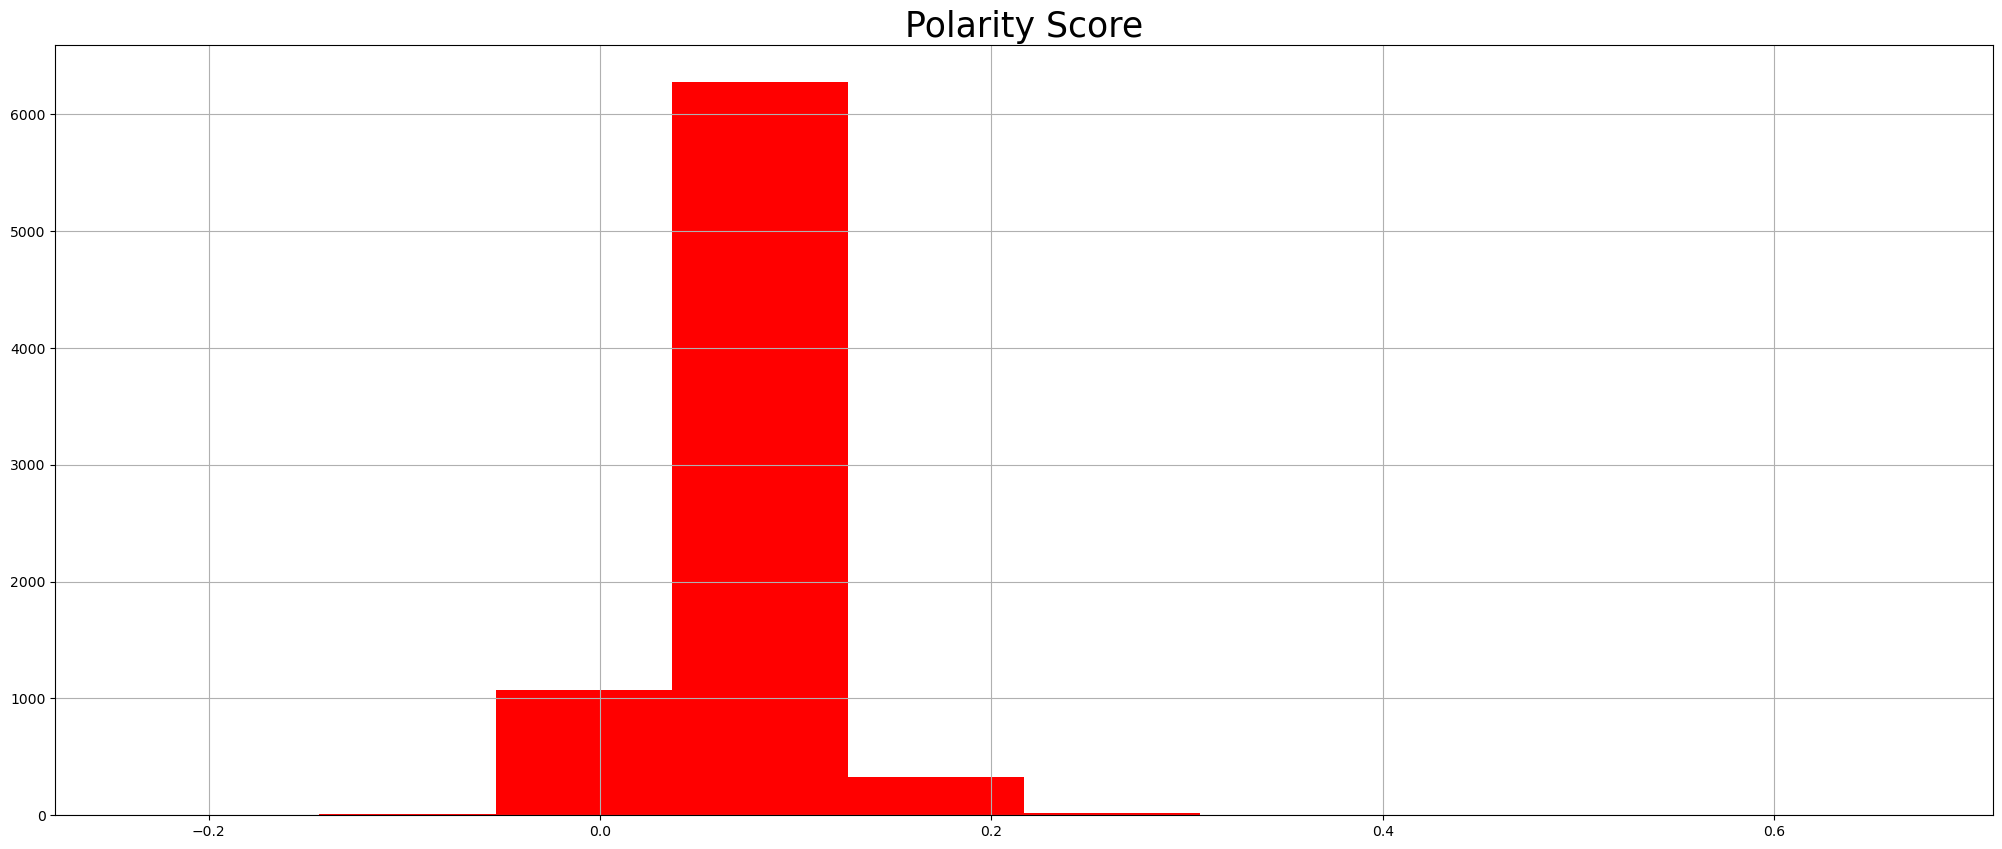

In [67]:
plt.figure(figsize=(25,10))
headlines['Polarity'].hist(color='red')
plt.title("Polarity Score",fontsize=25)
plt.show()

Text(0.5, 1.0, 'Subjectivity Score')

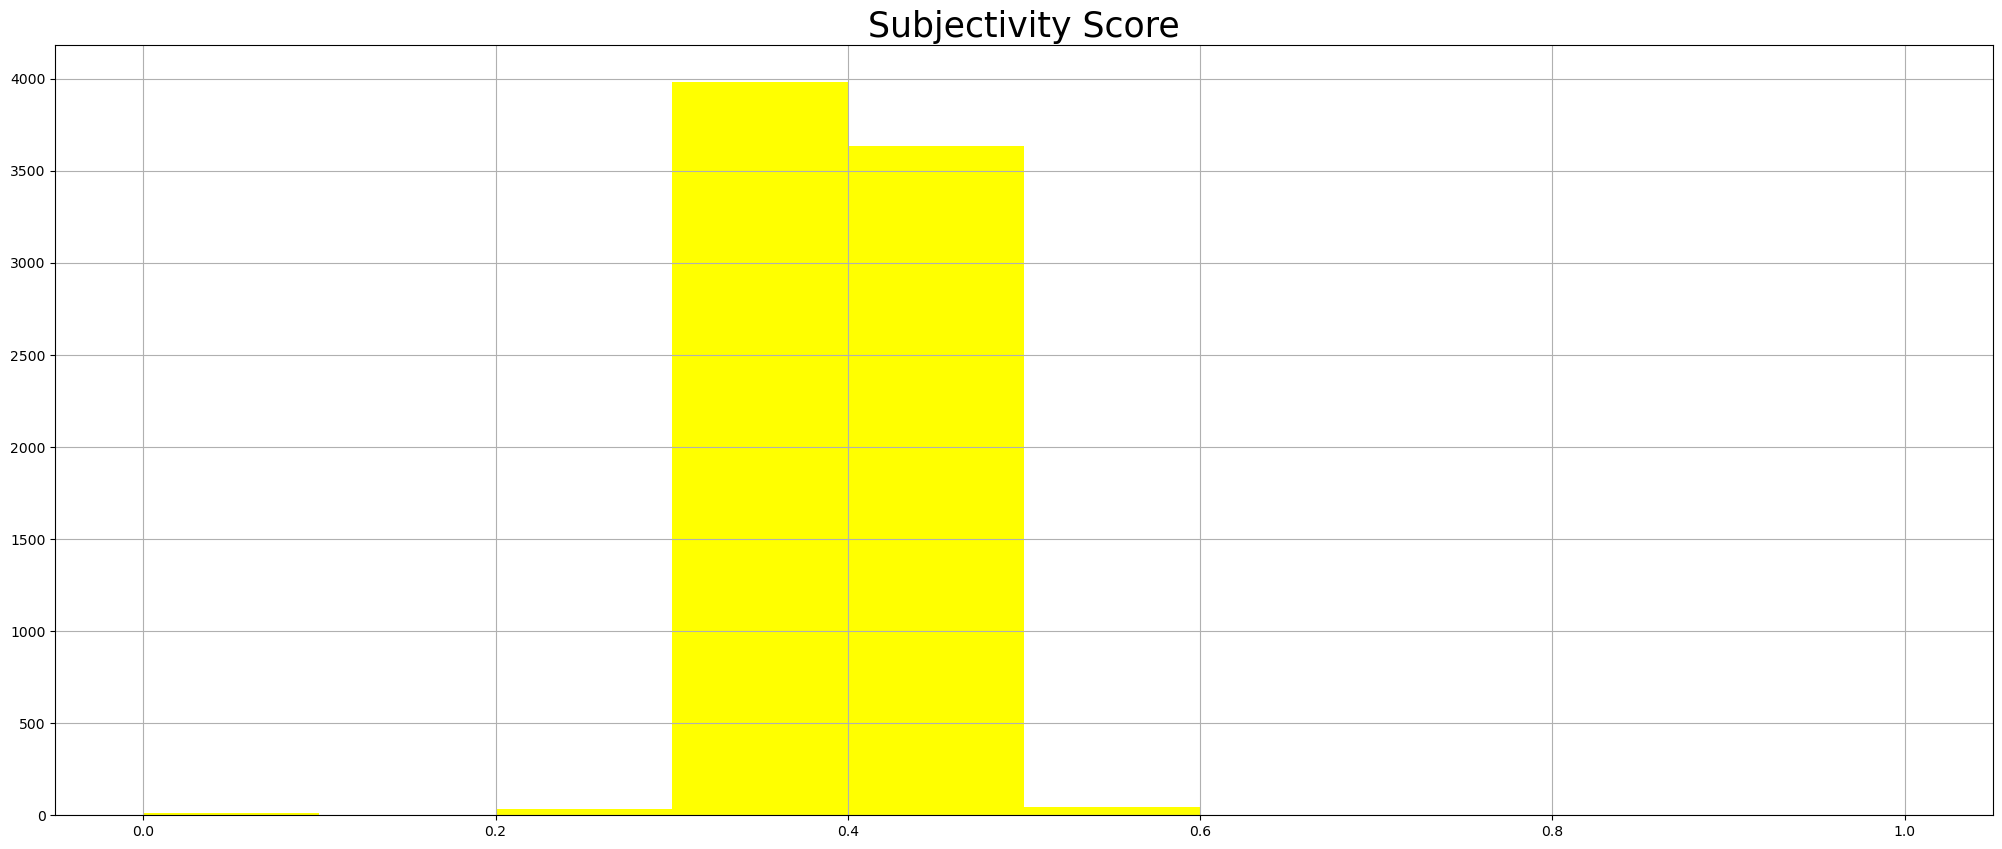

In [68]:
plt.figure(figsize=(25,10))
headlines['Subjectivity'].hist(color='yellow')
plt.title("Subjectivity Score",fontsize=25)

In [69]:
# Importing Sentimental Analysis

sia=SentimentIntensityAnalyzer()

In [70]:
headlines["Compound"]=[sia.polarity_scores(v)['compound'] for v in headlines['News']]

In [71]:
headlines["Negative"]=[sia.polarity_scores(v)['neg'] for v in headlines['News']]

In [72]:
headlines["Neutral"]=[sia.polarity_scores(v)['neu'] for v in headlines['News']]

In [73]:
headlines["Positive"]=[sia.polarity_scores(v)['pos'] for v in headlines['News']]

In [74]:
headlines.head()

,Date,News,Subjectivity,Polarity,Compound,Negative,Neutral,Positive
0,2001-01-02,Status quo will not be disturbed at Ayodhya s...,0.286859,0.143590,-0.9792,0.120,0.809,0.070
86,2001-01-03,Powerless north India gropes in the dark Think...,0.392857,0.089286,-0.8910,0.154,0.739,0.107
127,2001-01-04,The string that pulled Stephen Hawking to Indi...,0.445360,0.093039,0.7543,0.103,0.793,0.104
280,2001-01-05,Light combat craft takes India into club class...,0.480553,0.264024,0.9847,0.138,0.692,0.169
406,2001-01-06,Light combat craft takes India into club class...,0.439394,0.248485,-0.8316,0.211,0.659,0.130


In [75]:
headlines.tail()

,Date,News,Subjectivity,Polarity,Compound,Negative,Neutral,Positive
3648472,2022-03-27,Playing a dead man in Body God meant sitting i...,0.361211,0.033796,-0.9999,0.156,0.763,0.080
3648972,2022-03-28,As fashion becomes democratic demand for styl...,0.381673,0.058309,-0.9999,0.159,0.740,0.102
3649472,2022-03-29,Bobby Deol Like my dad I hope to be working ...,0.400626,0.091458,-0.9999,0.158,0.759,0.083
3649972,2022-03-30,I will not give in to trends Dossmode The tim...,0.340023,0.039476,-0.9999,0.153,0.773,0.073
3650472,2022-03-31,Shashank goes back to coastal Karnataka and Mo...,0.332126,0.028713,-0.9999,0.154,0.776,0.070


In [76]:
headlines.sample(6)

,Date,News,Subjectivity,Polarity,Compound,Negative,Neutral,Positive
409188,2006-05-14,Encroachments must go Jairaj Sleeping constab...,0.375757,0.049483,-0.9990,0.197,0.710,0.093
1298204,2012-02-01,The electorate in UP is politically sound ...,0.400457,0.067043,-0.9998,0.154,0.735,0.111
1961422,2014-09-11,Foods that go a long healthy way Recipe Veget...,0.415079,0.058504,-0.9999,0.170,0.718,0.112
474083,2007-05-12,Men are all polygamous Where is India s Jennif...,0.465498,0.034114,-0.9990,0.182,0.689,0.129
2330023,2016-02-21,Make your own butter toppings Grilled desserts...,0.388032,0.070131,-0.9999,0.164,0.719,0.117
309619,2004-07-04,Team India charged up Wright Whim is the name ...,0.477230,0.065113,-0.9977,0.160,0.751,0.089


In [78]:
headlines.shape

(7717, 8)

## Numerical/Historical Dataset Pre-Processing

In [79]:
stock.head()

,Date,High,Low,Open,Close,Volume,Adj Close
0,2015-01-02,27937.470703,27519.259766,27521.279297,27887.900391,7400.0,27887.900391
1,2015-01-05,28064.490234,27786.849609,27978.429688,27842.320312,9200.0,27842.320312
2,2015-01-06,27698.929688,26937.060547,27694.230469,26987.460938,14100.0,26987.460938
3,2015-01-07,27051.599609,26776.119141,26983.429688,26908.820312,12200.0,26908.820312
4,2015-01-08,27316.410156,27101.939453,27178.769531,27274.710938,8200.0,27274.710938


In [80]:
stock=stock[['Date','High','Low','Open','Close','Volume']]

In [81]:
len(stock)

1958

In [82]:
stock.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1958 entries, 0 to 1957
Data columns (total 6 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   Date    1958 non-null   datetime64[ns]
 1   High    1958 non-null   float64       
 2   Low     1958 non-null   float64       
 3   Open    1958 non-null   float64       
 4   Close   1958 non-null   float64       
 5   Volume  1958 non-null   float64       
dtypes: datetime64[ns](1), float64(5)
memory usage: 91.9 KB


In [83]:
stock.isnull().sum()

Date      0
High      0
Low       0
Open      0
Close     0
Volume    0
dtype: int64

In [84]:
stock.dropna(inplace=True)

In [85]:
len(stock)

1958

In [86]:
stock.describe()

,High,Low,Open,Close,Volume
count,1958.000000,1958.000000,1958.000000,1958.000000,1.958000e+03
mean,38634.890940,38178.314566,38446.976897,38404.888066,1.762398e+05
std,11204.551714,11082.567981,11147.433992,11152.488063,1.687081e+06
min,23142.960938,22494.609375,23060.390625,22951.830078,0.000000e+00
25%,28863.078125,28509.964355,28736.029785,28678.103027,9.300000e+03
50%,35839.054688,35494.445312,35736.935547,35691.060547,1.230000e+04
75%,47046.553711,46425.786133,46766.612305,46822.384766,1.750000e+04
max,63583.070312,63183.769531,63357.988281,63284.191406,3.181510e+07


## Data Visualization

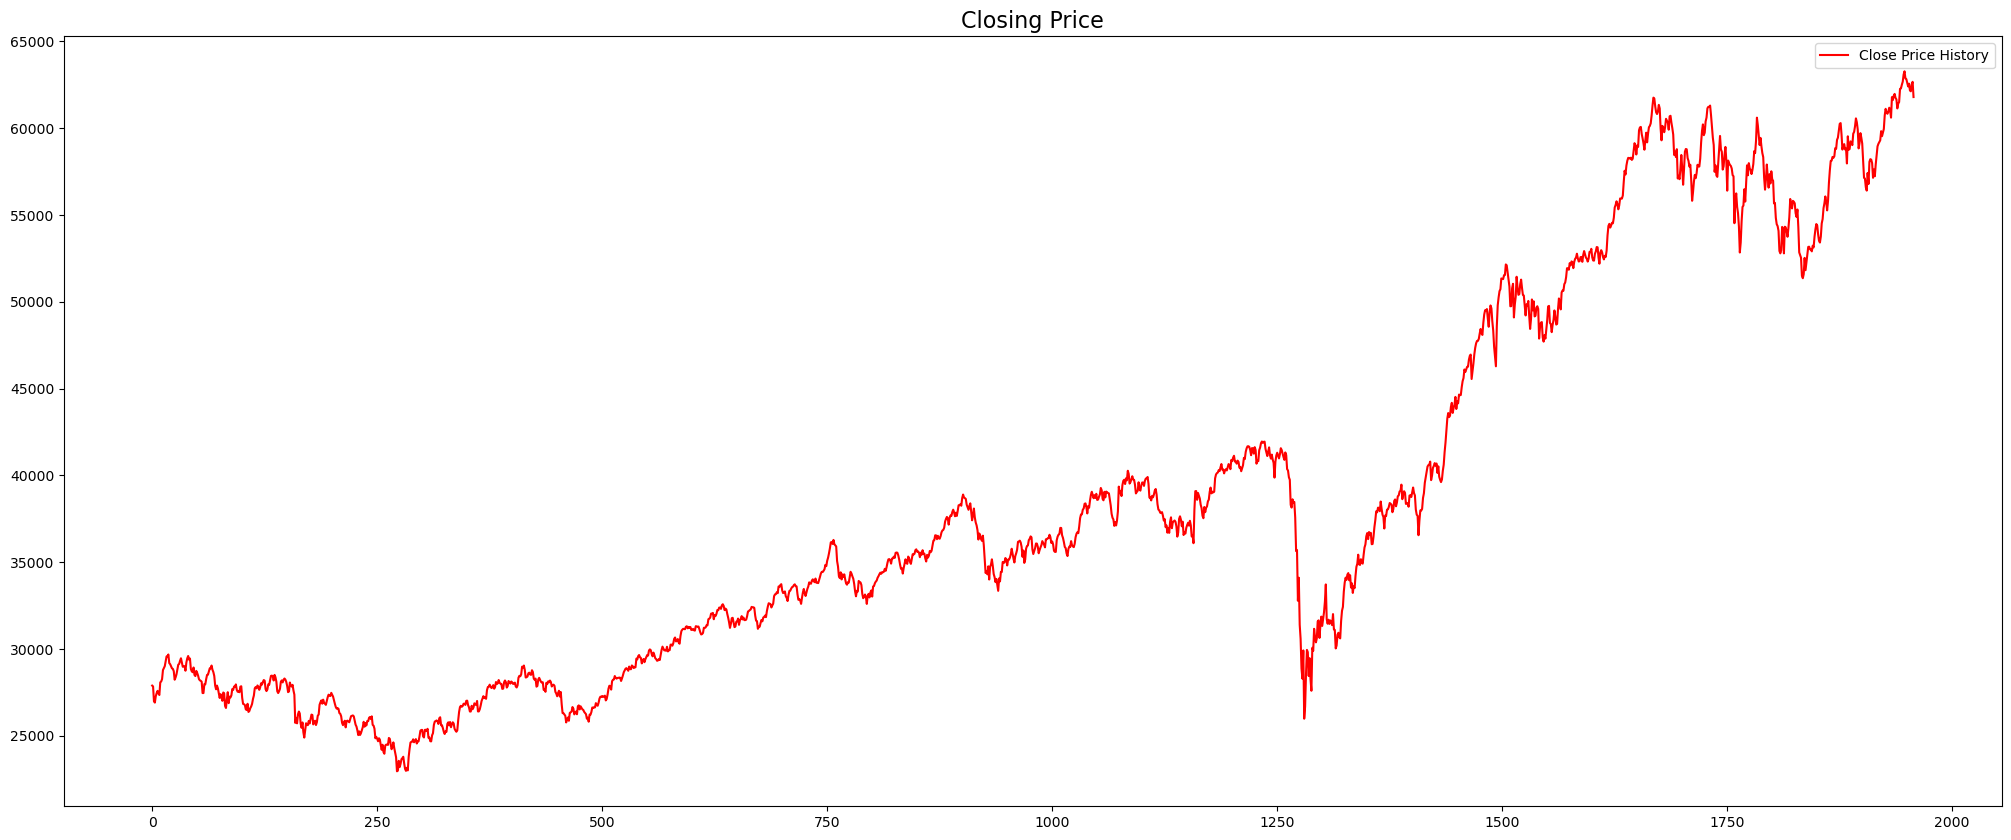

In [87]:
# Closing Price Graph

plt.figure(figsize=(25,10))

plt.plot(stock['Close'],label="Close Price History",color='red')
plt.legend()
plt.title("Closing Price",fontsize=16)
plt.show()

#### Plotting Moving Average.

Moving Average: In finance, a moving average (MA) is a stock indicator commonly used in technical analysis. The reason for calculating the moving average of a stock is to help smooth out the price data by creating a constantly updated average price.

Moving averages are calculated to identify the trend direction of a stock or to determine its support and resistance levels. It is a trend-following or lagging, indicator because it is based on past prices.

The longer the period for the moving average, the greater the lag. A 200-day moving average will have a much greater degree of lag than a 20-day MA because it contains prices for the past 200 days. 

* Why rolling mean is used?

They are typically utilized to smooth out data series. The ultimate purpose of rolling averages is to identify long—term trends. They are calculated by averaging a group of observations of a variable of interest over a specific period of time. Such averaged number becomes representative of that period in a trend line.

* What is Rolling Standard Deviation?

The moving standard deviation is a measure of market volatility. It makes no predictions of market direction, but it may serve as a confirming indicator. You specify the number of periods to use, and the study computes the standard deviation of prices from the moving average of the prices.

#Plotting the Moving Average.

close=stock['Close']

MA=close.rolling(window=50).mean()
std=close.rolling(window=50).std()

plt.figure(figsize=(12,6))
plt.plot(stock['Close'],label='Close Price History',color='blue')

plt.plot(MA,label='Rolling Mean',color='red')
plt.plot(std,label='Rolling Standard Deviation',color='green')

plt.legend()

plt.title("Moving Average",fontsize=16)



A return is the change in price of an asset, investment, or project over time, which may be represented in terms of price change or percentage change. A positive return represents a profit while a negative return marks a loss.

#Dickey Fuller Test:


When we make a model for forecasting purposes in time series analysis, we require a stationary time series for better prediction. So the first step to work on modeling is to make a time series stationary. Testing for stationarity is a frequently used activity in autoregressive modeling. We can perform various tests like the KPSS, Phillips–Perron, and Augmented Dickey-Fuller. 


ADF (Augmented Dickey-Fuller) test is a statistical significance test which means the test will give results in hypothesis tests with null and alternative hypotheses. As a result, we will have a p-value from which we will need to make inferences about the time series, whether it is stationary or not.



A simple AR model can be represented as:


where

yt is variable of interest at the time t
ρ is a coefficient that defines the unit root
ut  is noise or can be considered as an error term.
If ρ = 1, the unit root is present in a time series, and the time series is non-stationary.

If a regression model can be represented as 


Where 

Δ is a difference operator.
ẟ = ρ-1
So here, if ρ = 1, which means we will get the differencing as the error term and if the coefficient has some values smaller than one or bigger than one, we will see the changes according to the past observation.



Implementation of ADF Test
To perform the ADF test in any time series package, statsmodel provides the implementation function adfuller().

Function adfuller() provides the following information.

p-value
Value of the test statistic
Number of lags for testing consideration
The critical values




* What is Stationary and Non stationary time series?

A stationary time series has statistical properties or moments (e.g., mean and variance) that do not vary in time. Stationarity, then, is the status of a stationary time series. Conversely, nonstationarity is the status of a time series whose statistical properties are changing through time.

In [90]:
# Stationary Test

# defining the function

def test_stationary(timeseries):
    rolmean=timeseries.rolling(20).mean()
    rolstd=timeseries.rolling(20).std()
    
# Plotting the Rolling Statistics.

    plt.figure(figsize=(16,9))
    plt.plot(timeseries,color='blue',label='Original')
    plt.plot(rolmean,color='red',label="Rolling Mean")
    plt.plot(rolstd,color='green',label="Rolling Standard Deviation")
    plt.legend()
    plt.title('Rolling Mean and Standard Deviation',fontsize=16)
    plt.show(block=False)
    
    print("Result of Dickey Fuller Test")
    result=adfuller(timeseries, autolag='AIC')
    labels=['ADF Test Statistics','p-value','Number of Lags Used','Number of Observations Used']
    
    for value,label in zip(result,labels):
        print(label+' : '+ str(value))

    if result[1] <= 0.05:
        print("Strong Evidence against the null hypothesis(H0),Reject the Null Hypothesis. Data is Stationary.")
    else:
        print("Weak Evidence againt null hypothesis,time series is non-stationary.")

In [91]:
#Split data

train,test=stock[:1123], stock[1123:len(stock)]

In [92]:
train.head()

,Date,High,Low,Open,Close,Volume
0,2015-01-02,27937.470703,27519.259766,27521.279297,27887.900391,7400.0
1,2015-01-05,28064.490234,27786.849609,27978.429688,27842.320312,9200.0
2,2015-01-06,27698.929688,26937.060547,27694.230469,26987.460938,14100.0
3,2015-01-07,27051.599609,26776.119141,26983.429688,26908.820312,12200.0
4,2015-01-08,27316.410156,27101.939453,27178.769531,27274.710938,8200.0


In [93]:
train.tail()

,Date,High,Low,Open,Close,Volume
1118,2019-07-22,38333.519531,37890.320312,38333.519531,38031.128906,23000.0
1119,2019-07-23,38217.808594,37898.898438,38138.558594,37982.738281,19300.0
1120,2019-07-24,38102.839844,37708.410156,37990.230469,37847.648438,16600.0
1121,2019-07-25,38169.871094,37775.511719,37935.019531,37830.980469,18000.0
1122,2019-07-26,37978.070312,37690.468750,37831.179688,37882.789062,24100.0


In [94]:
train.sample(6)

,Date,High,Low,Open,Close,Volume
19,2015-01-30,29844.160156,29070.480469,29801.599609,29182.949219,15800.0
911,2018-09-11,38043.269531,37361.199219,38017.488281,37413.128906,11900.0
795,2018-03-26,33115.410156,32515.169922,32536.439453,33066.410156,16400.0
840,2018-05-31,35416.031250,34926.078125,35083.808594,35322.378906,22900.0
273,2016-02-12,23161.150391,22600.390625,23060.390625,22986.119141,25100.0
857,2018-06-25,35806.968750,35430.109375,35783.750000,35470.351562,11800.0


In [95]:
train.shape

(1123, 6)

In [96]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1123 entries, 0 to 1122
Data columns (total 6 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   Date    1123 non-null   datetime64[ns]
 1   High    1123 non-null   float64       
 2   Low     1123 non-null   float64       
 3   Open    1123 non-null   float64       
 4   Close   1123 non-null   float64       
 5   Volume  1123 non-null   float64       
dtypes: datetime64[ns](1), float64(5)
memory usage: 52.8 KB


In [97]:
test.head()

,Date,High,Low,Open,Close,Volume
1123,2019-07-29,38043.218750,37519.160156,38043.218750,37686.371094,21100.0
1124,2019-07-30,37950.210938,37359.031250,37735.539062,37397.238281,22800.0
1125,2019-07-31,37576.371094,37128.261719,37257.550781,37481.121094,27200.0
1126,2019-08-01,37387.179688,36694.179688,37387.179688,37018.320312,21000.0
1127,2019-08-02,37375.160156,36607.410156,36920.109375,37118.218750,28100.0


In [98]:
test.tail()

,Date,High,Low,Open,Close,Volume
1953,2022-12-09,62735.421875,61889.109375,62690.859375,62181.671875,7300.0
1954,2022-12-12,62239.421875,61676.148438,61770.558594,62130.570312,7000.0
1955,2022-12-13,62567.921875,62129.570312,62300.671875,62533.300781,12000.0
1956,2022-12-14,62835.109375,62591.281250,62685.941406,62677.910156,5700.0
1957,2022-12-15,62624.808594,61715.609375,62530.070312,61799.031250,5600.0


In [99]:
test.sample()

,Date,High,Low,Open,Close,Volume
1489,2021-01-22,49676.878906,48832.078125,49594.949219,48878.539062,18400.0


In [100]:
test.shape

(835, 6)

In [103]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 835 entries, 1123 to 1957
Data columns (total 6 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   Date    835 non-null    datetime64[ns]
 1   High    835 non-null    float64       
 2   Low     835 non-null    float64       
 3   Open    835 non-null    float64       
 4   Close   835 non-null    float64       
 5   Volume  835 non-null    float64       
dtypes: datetime64[ns](1), float64(5)
memory usage: 39.3 KB


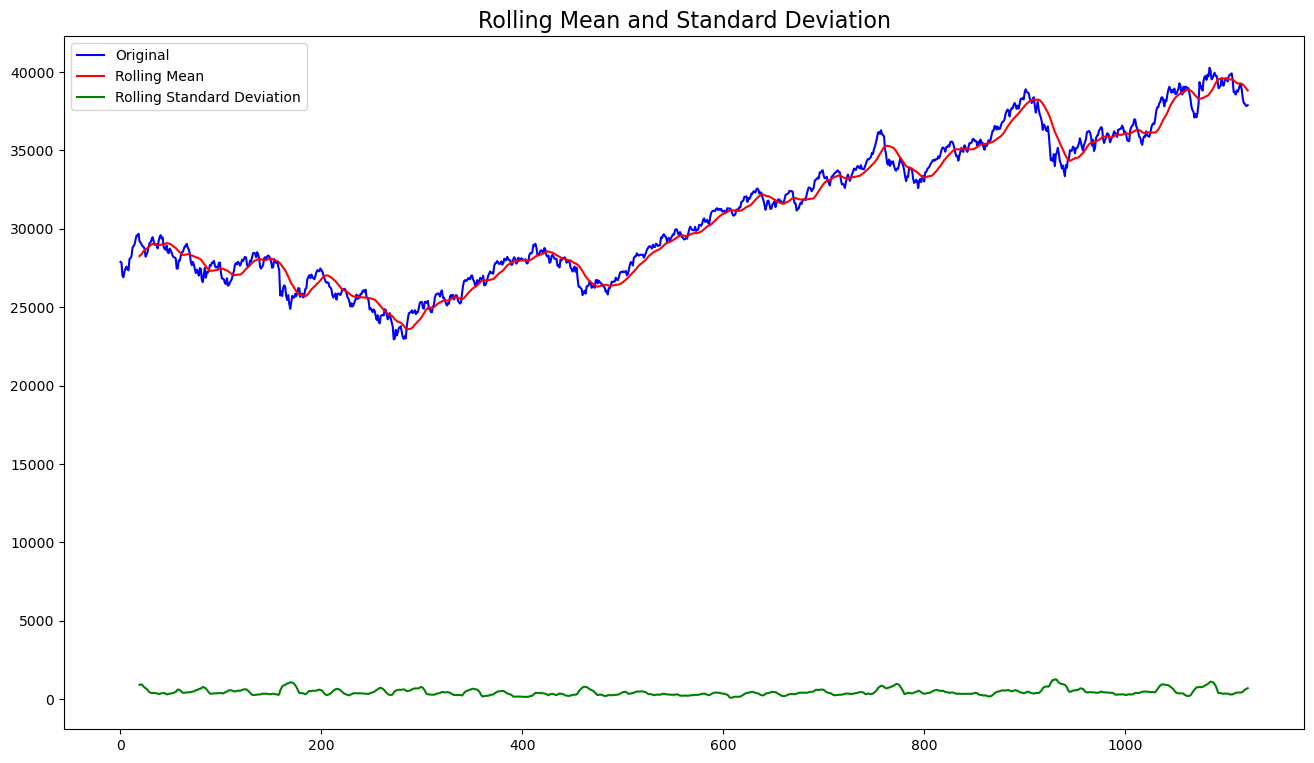

Result of Dickey Fuller Test
ADF Test Statistics : -0.5610338961455847
p-value : 0.8795459537365793
Number of Lags Used : 1
Number of Observations Used : 1121
Weak Evidence againt null hypothesis,time series is non-stationary.


In [104]:
# Applying the stationary test on train close data.

test_stationary(train['Close']) 

In [105]:
# Log value of closed price

np.log(train['Close']).head()

0    10.235948
1    10.234312
2    10.203128
3    10.200209
4    10.213715
Name: Close, dtype: float64

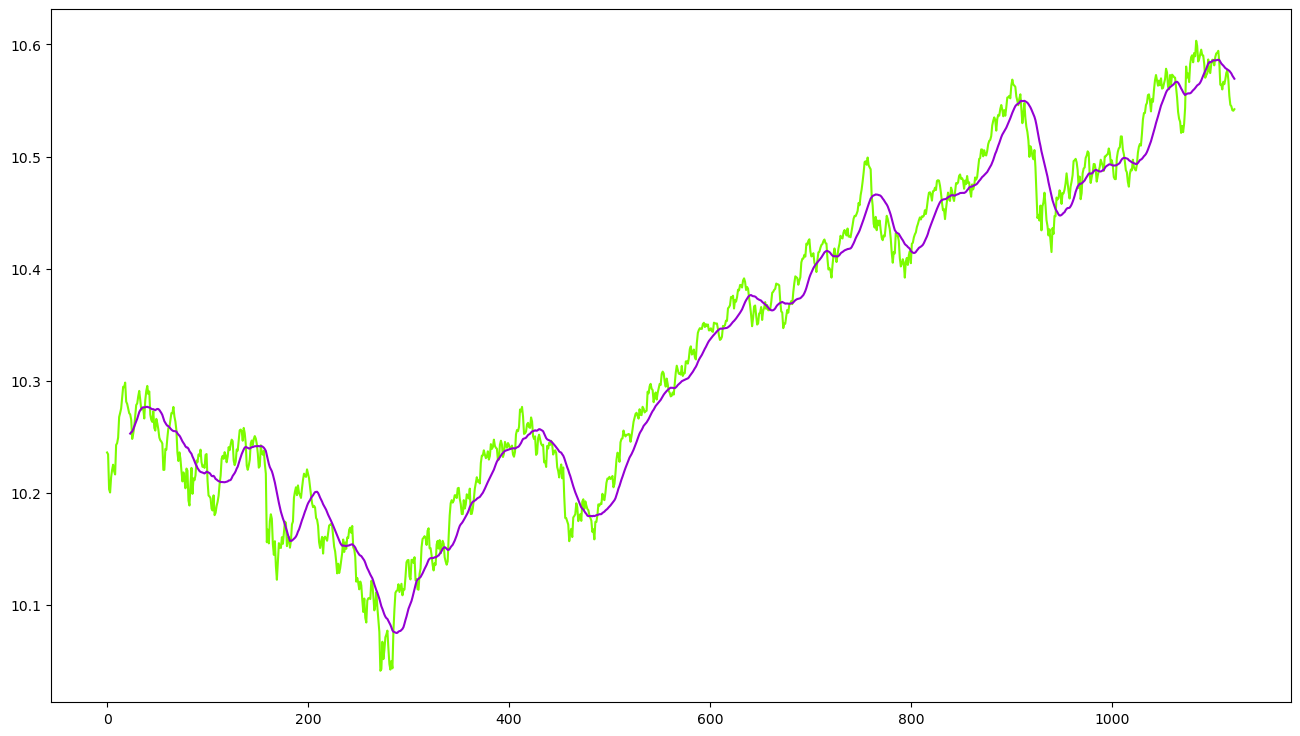

In [106]:
train_log=np.log(train['Close'])
test_log=np.log(test['Close'])

mav=train_log.rolling(24).mean()
plt.figure(figsize=(16,9))

plt.plot(train_log,color='lawngreen')
plt.plot(mav,color='darkviolet')

In [107]:
train_log.dropna(inplace=True)
test_log.dropna(inplace=True)

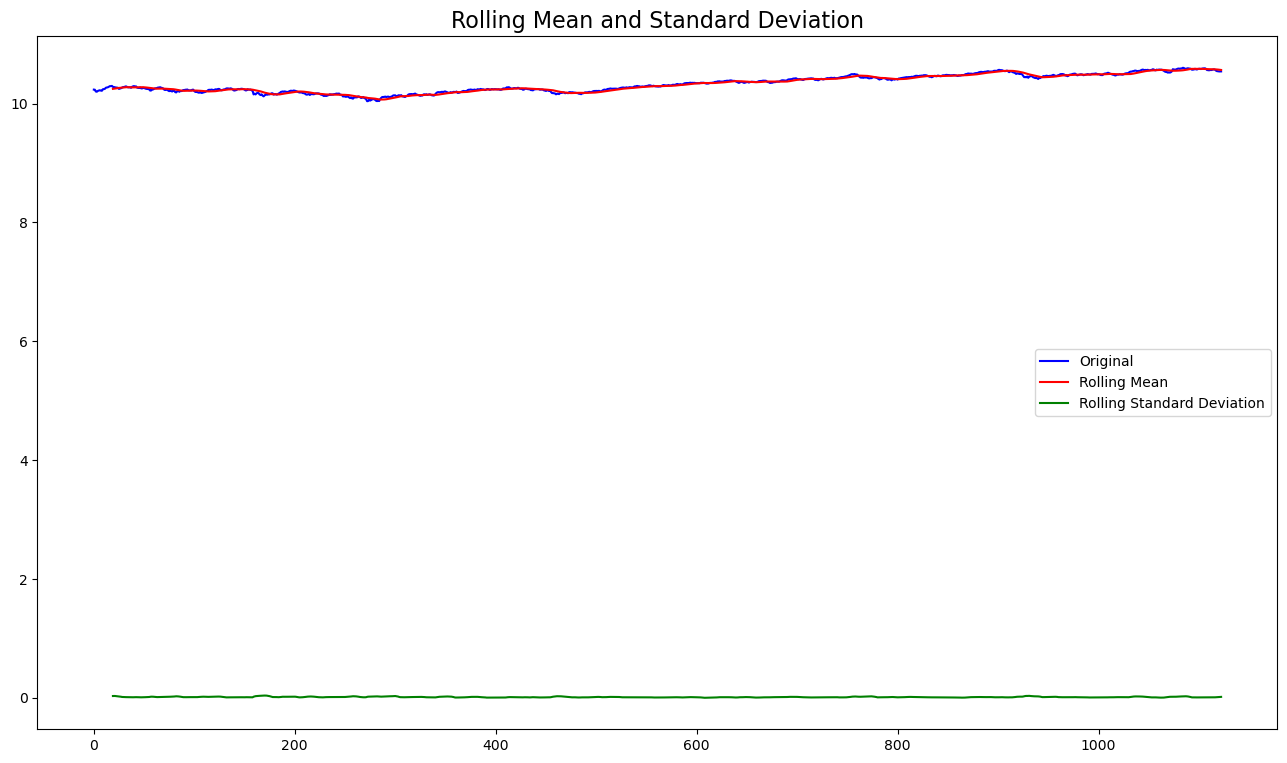

Result of Dickey Fuller Test
ADF Test Statistics : -0.6415612127033528
p-value : 0.8613116958466808
Number of Lags Used : 1
Number of Observations Used : 1121
Weak Evidence againt null hypothesis,time series is non-stationary.


In [108]:
test_stationary(train_log)

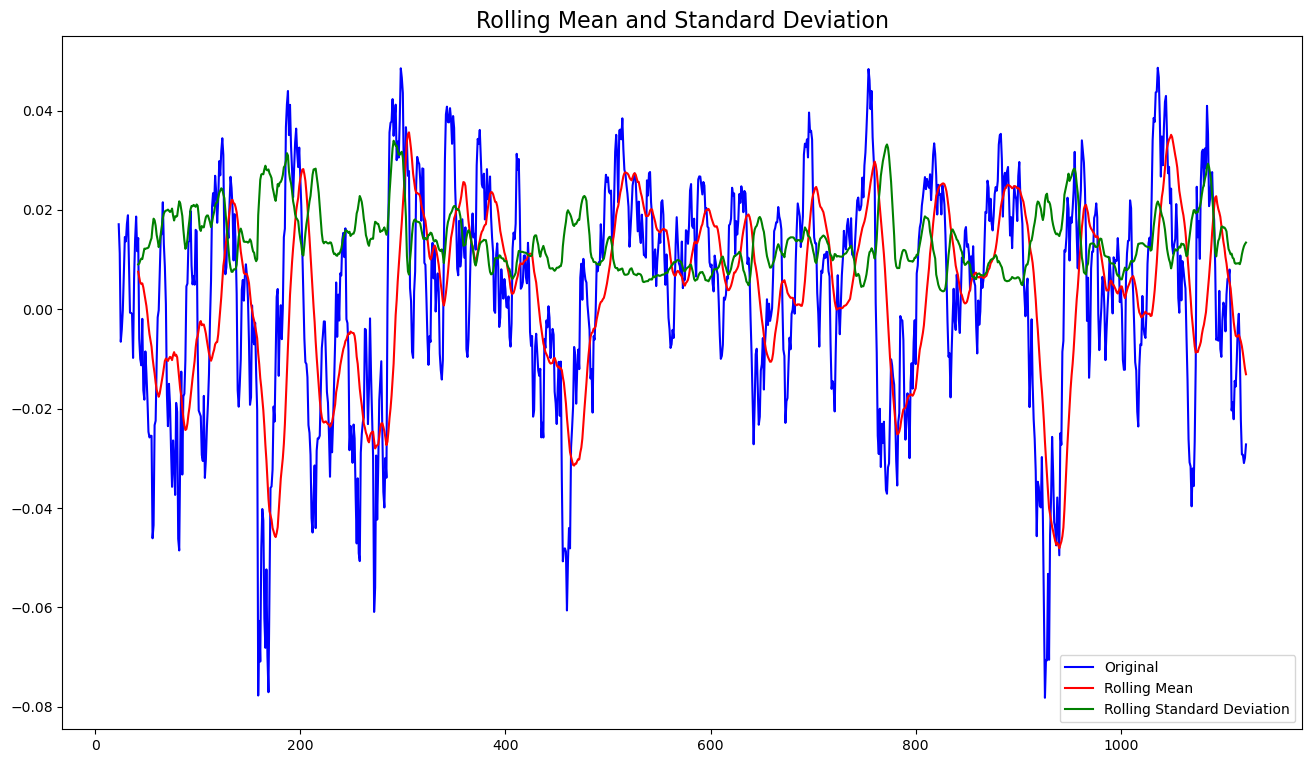

Result of Dickey Fuller Test
ADF Test Statistics : -6.919716868251113
p-value : 1.1548253897493516e-09
Number of Lags Used : 3
Number of Observations Used : 1096
Strong Evidence against the null hypothesis(H0),Reject the Null Hypothesis. Data is Stationary.


In [109]:
train_log_diff=train_log-mav

train_log_diff.dropna(inplace=True)
test_stationary(train_log_diff)

## Model Building

In [110]:
# Using the auto ARIMA to make predictions using log data.
# FIRST WE NEED TO INSTALL pmdarima in comand prompt using the code pip install pmdarima

In [112]:
from pmdarima import auto_arima

In [113]:
model=auto_arima(train_log,trace=True,error_action='ignore',suppress_warnings=True)

model.fit(train_log)

predictions=model.predict(n_periods= len(test))
predictions=pd.DataFrame(predictions, index=test_log.index, columns=['Prediction'])

Performing stepwise search to minimize aic
 ARIMA(2,1,2)(0,0,0)[0] intercept   : AIC=-7534.055, Time=1.67 sec
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=-7537.195, Time=0.27 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=-7540.017, Time=0.42 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=-7540.057, Time=0.33 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=-7538.010, Time=0.11 sec
 ARIMA(1,1,1)(0,0,0)[0] intercept   : AIC=-7538.073, Time=0.29 sec
 ARIMA(0,1,2)(0,0,0)[0] intercept   : AIC=-7538.005, Time=0.38 sec
 ARIMA(1,1,2)(0,0,0)[0] intercept   : AIC=-7536.044, Time=0.89 sec
 ARIMA(0,1,1)(0,0,0)[0]             : AIC=-7541.011, Time=0.09 sec
 ARIMA(1,1,1)(0,0,0)[0]             : AIC=-7539.017, Time=0.12 sec
 ARIMA(0,1,2)(0,0,0)[0]             : AIC=-7538.952, Time=0.15 sec
 ARIMA(1,1,0)(0,0,0)[0]             : AIC=-7540.979, Time=0.17 sec
 ARIMA(1,1,2)(0,0,0)[0]             : AIC=-7536.995, Time=0.61 sec

Best model:  ARIMA(0,1,1)(0,0,0)[0]          
Total fit time: 5.538 seconds


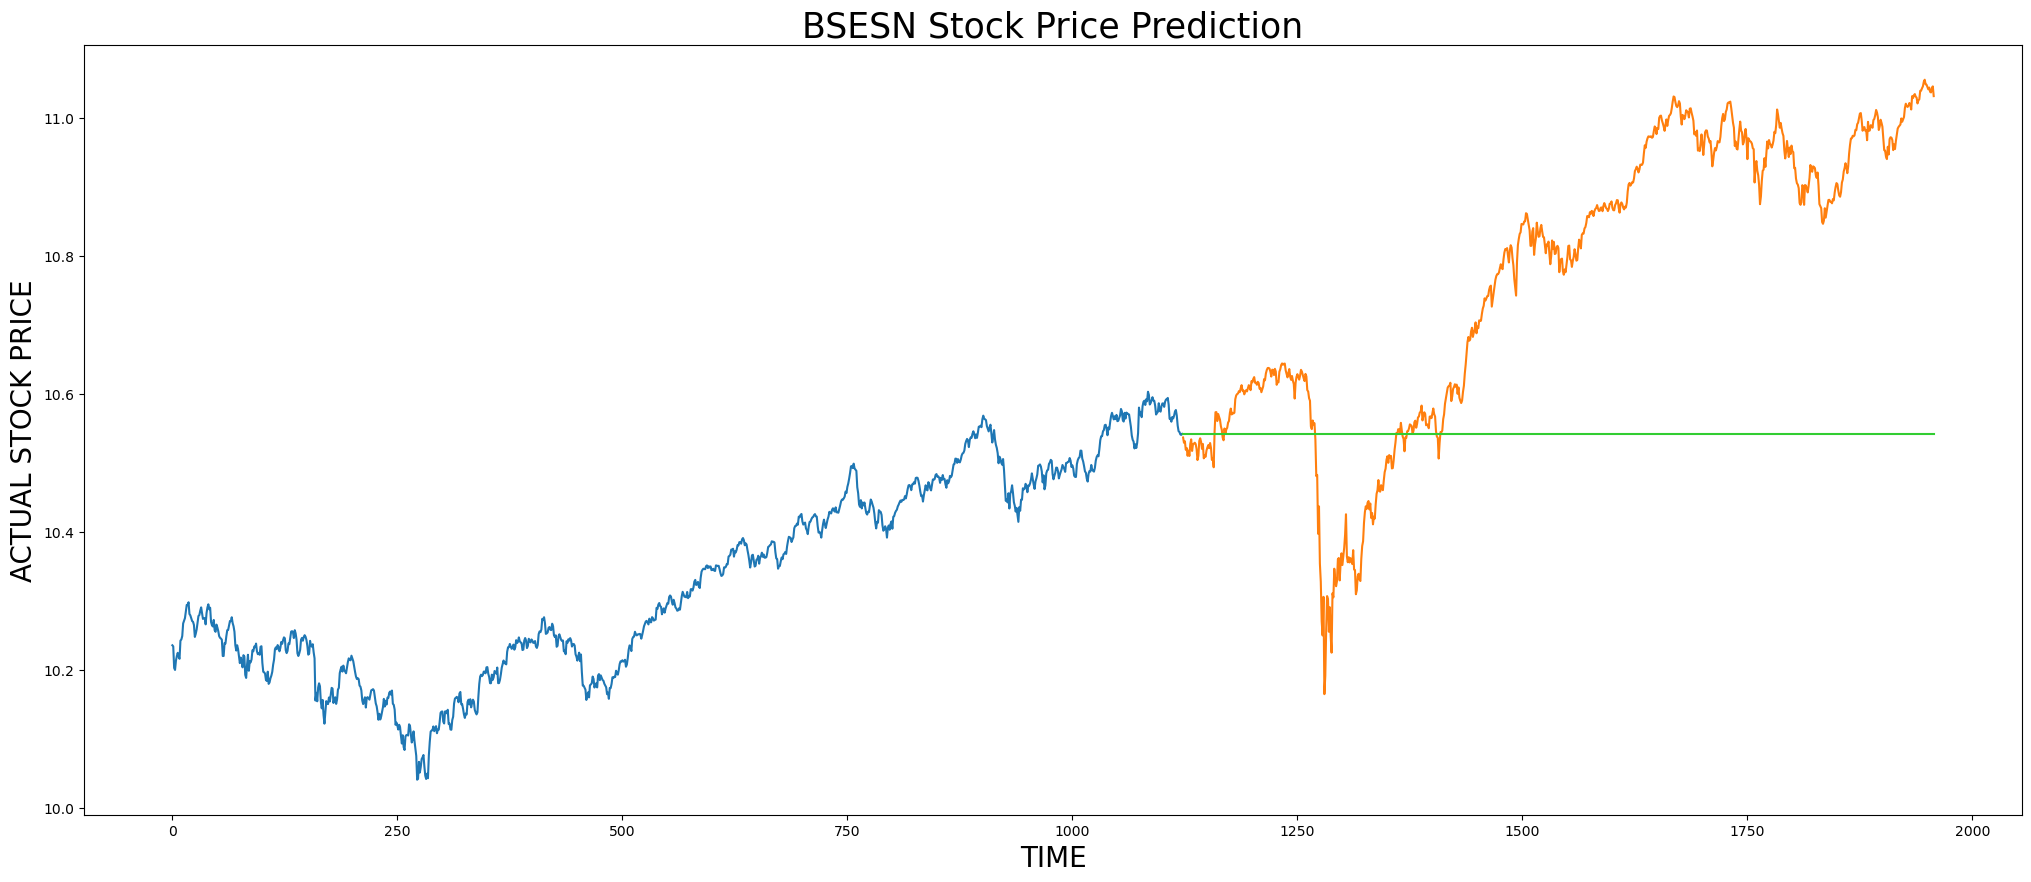

In [114]:
plt.figure(figsize=(25,10))
plt.plot(train_log,label='Train')
plt.plot(test_log,label="Test")
plt.plot(predictions,color='limegreen' ,label="Prediction")

plt.title("BSESN Stock Price Prediction", fontsize = 25)
plt.xlabel("TIME", fontsize = 20)
plt.ylabel("ACTUAL STOCK PRICE", fontsize = 20)
plt.show()

In [115]:
#Lime Green line depicts the prediction.

In [116]:
#Root mean squared error.

rmse=np.sqrt(mean_squared_error(test_log,predictions))
print("The Root mean squared error is :",rmse)

The Root mean squared error is : 0.3059770888083203


In [118]:
news.sample(10)

,Date,News,Subjectivity,Polarity,Compound,Negative,Neutral,Positive
638104,2008-11-03,This too shall pass Can t find a job Groom yo...,0.380345,0.033512,-0.9997,0.184,0.711,0.105
2579221,2017-02-12,I m a very sorted traveller Sonu Sood Men loo...,0.408958,0.103334,-0.9999,0.177,0.711,0.113
369419,2005-09-17,Broadband growth hit by internal troubles Micr...,0.405333,0.078945,-0.9965,0.183,0.701,0.116
1522019,2012-12-19,In 1974 film making was declared as industry ...,0.388127,0.090496,-1.0000,0.191,0.717,0.092
1914675,2014-07-06,Recipe Sausage and peas pie First liplock of ...,0.386464,0.115543,-0.9998,0.151,0.734,0.114
432072,2006-09-20,Readerspeak Nothing less than death penalty T...,0.409938,0.056584,-0.9991,0.169,0.756,0.075
3241458,2020-01-01,Happy New Year 2020 Images Quotes Wishes M...,0.425920,0.056494,-0.9999,0.149,0.773,0.078
2955570,2018-08-05,Bhanu Uday quits Saam Daam Dand Bhed Top 10 d...,0.405341,0.078670,-0.9998,0.144,0.744,0.112
334504,2004-11-23,Wife basher Pandey suspended probe on Govt to...,0.451271,0.086748,0.3261,0.130,0.741,0.129
533185,2007-12-20,Akshay Kumar s dare devilry Sanjay Dutt in Ali...,0.427162,0.063191,-0.9993,0.160,0.756,0.084


In [119]:
# Using different models to determine the best performing model using root mean squared error

In [121]:
# Merge the Numerical and Textual Data

df_merge=pd.merge(headlines,stock,how='inner',on='Date')

In [122]:
df_merge.head()

,Date,News,Subjectivity,Polarity,Compound,Negative,Neutral,Positive,High,Low,Open,Close,Volume
0,2015-01-02,Drink smart with these party tips How to say s...,0.453628,0.053545,-0.9998,0.149,0.735,0.116,27937.470703,27519.259766,27521.279297,27887.900391,7400.0
1,2015-01-05,Recipe Strawberry cupcakes Recipe Kaju jeera...,0.429367,0.100463,-0.9994,0.135,0.753,0.113,28064.490234,27786.849609,27978.429688,27842.320312,9200.0
2,2015-01-06,Turn to gardening for happiness Teeth jeweller...,0.388354,0.060982,-0.9996,0.119,0.796,0.085,27698.929688,26937.060547,27694.230469,26987.460938,14100.0
3,2015-01-07,Can ex lovers be friends Is water diet bad for...,0.386384,0.033056,-1.0000,0.168,0.738,0.093,27051.599609,26776.119141,26983.429688,26908.820312,12200.0
4,2015-01-08,How to do a home manicure Recipe Spiced beetr...,0.403431,0.063415,-0.9999,0.144,0.771,0.085,27316.410156,27101.939453,27178.769531,27274.710938,8200.0


In [123]:
df_merge.tail()

,Date,News,Subjectivity,Polarity,Compound,Negative,Neutral,Positive,High,Low,Open,Close,Volume
1777,2022-03-25,Speeding up shortcuts and tackling unruly cus...,0.367225,-0.003859,-1.0000,0.182,0.743,0.075,57845.371094,57100.238281,57801.718750,57362.199219,6900.0
1778,2022-03-28,As fashion becomes democratic demand for styl...,0.381673,0.058309,-0.9999,0.159,0.740,0.102,57638.339844,56825.089844,57472.718750,57593.488281,6300.0
1779,2022-03-29,Bobby Deol Like my dad I hope to be working ...,0.400626,0.091458,-0.9999,0.158,0.759,0.083,58001.531250,57639.351562,57814.761719,57943.648438,12100.0
1780,2022-03-30,I will not give in to trends Dossmode The tim...,0.340023,0.039476,-0.9999,0.153,0.773,0.073,58727.781250,58176.000000,58362.851562,58683.988281,6300.0
1781,2022-03-31,Shashank goes back to coastal Karnataka and Mo...,0.332126,0.028713,-0.9999,0.154,0.776,0.070,58890.921875,58485.789062,58779.710938,58568.511719,4400.0


In [124]:
df_merge.sample(6)

,Date,News,Subjectivity,Polarity,Compound,Negative,Neutral,Positive,High,Low,Open,Close,Volume
393,2016-08-09,5 easy breakfast ideas Minister meets rape sur...,0.362448,0.057775,-0.9999,0.153,0.760,0.087,28289.960938,27956.769531,28289.220703,28085.160156,14200.0
862,2018-07-02,how to file income tax returns if you dont hav...,0.370840,0.073595,-0.9999,0.159,0.746,0.096,35578.238281,35106.570312,35545.218750,35264.410156,14800.0
1177,2019-10-22,Goa Piyush Goyal has to study Isaac Newton s...,0.398656,0.045721,-0.9998,0.142,0.766,0.092,39426.468750,38924.851562,39233.398438,38963.839844,54500.0
528,2017-02-27,Permanent building ready employment office st...,0.360208,0.077857,-0.9999,0.170,0.712,0.118,28961.830078,28791.189453,28910.500000,28812.880859,12000.0
751,2018-01-18,Yuga Chandru turns actor with Kanaka Charan Ra...,0.423320,0.059919,-0.9998,0.132,0.784,0.084,35507.359375,35166.441406,35366.449219,35260.289062,15700.0
119,2015-06-29,Gifting ideas for a baby shower Married Indian...,0.434701,0.094900,-0.9995,0.149,0.723,0.128,27695.320312,27209.189453,27451.070312,27645.150391,10900.0


In [125]:
# Creating a Dataset for Model Training

In [126]:
final=df_merge[['Close','Subjectivity','Polarity','Compound','Negative','Neutral','Positive']]

In [127]:
final.head()

,Close,Subjectivity,Polarity,Compound,Negative,Neutral,Positive
0,27887.900391,0.453628,0.053545,-0.9998,0.149,0.735,0.116
1,27842.320312,0.429367,0.100463,-0.9994,0.135,0.753,0.113
2,26987.460938,0.388354,0.060982,-0.9996,0.119,0.796,0.085
3,26908.820312,0.386384,0.033056,-1.0000,0.168,0.738,0.093
4,27274.710938,0.403431,0.063415,-0.9999,0.144,0.771,0.085


In [128]:
final.tail()

,Close,Subjectivity,Polarity,Compound,Negative,Neutral,Positive
1777,57362.199219,0.367225,-0.003859,-1.0000,0.182,0.743,0.075
1778,57593.488281,0.381673,0.058309,-0.9999,0.159,0.740,0.102
1779,57943.648438,0.400626,0.091458,-0.9999,0.158,0.759,0.083
1780,58683.988281,0.340023,0.039476,-0.9999,0.153,0.773,0.073
1781,58568.511719,0.332126,0.028713,-0.9999,0.154,0.776,0.070


In [129]:
final.sample(6)

,Close,Subjectivity,Polarity,Compound,Negative,Neutral,Positive
933,35162.480469,0.362636,0.028168,-0.9999,0.152,0.762,0.086
938,34033.960938,0.412805,0.053122,-0.9999,0.152,0.749,0.099
617,31360.630859,0.370715,0.082093,-0.9999,0.152,0.743,0.105
1414,39574.570312,0.397432,0.071061,-0.9999,0.137,0.790,0.072
1710,57011.738281,0.363647,0.067184,-0.9998,0.138,0.777,0.084
1080,39749.730469,0.421210,0.046992,-1.0000,0.168,0.759,0.073


In [130]:
# Normalize Data

from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()

In [131]:
df1 = pd.DataFrame(scaler.fit_transform(final))

In [132]:
df1.columns = final.columns

In [133]:
df1.index = final.index

In [134]:
df1.head()

,Close,Subjectivity,Polarity,Compound,Negative,Neutral,Positive
0,0.127173,0.902308,0.379151,0.00010,0.492308,0.271676,0.529412
1,0.125999,0.740629,0.652156,0.00030,0.384615,0.375723,0.504202
2,0.103974,0.467313,0.422430,0.00020,0.261538,0.624277,0.268908
3,0.101948,0.454182,0.259932,0.00000,0.638462,0.289017,0.336134
4,0.111375,0.567787,0.436583,0.00005,0.453846,0.479769,0.268908


In [135]:
df1.tail()

,Close,Subjectivity,Polarity,Compound,Negative,Neutral,Positive
1777,0.886551,0.326509,0.045136,0.00000,0.746154,0.317919,0.184874
1778,0.892510,0.422788,0.406872,0.00005,0.569231,0.300578,0.411765
1779,0.901531,0.549097,0.599762,0.00005,0.561538,0.410405,0.252101
1780,0.920605,0.145229,0.297291,0.00005,0.523077,0.491329,0.168067
1781,0.917630,0.092600,0.234662,0.00005,0.530769,0.508671,0.142857


In [136]:
df1.sample(6)

,Close,Subjectivity,Polarity,Compound,Negative,Neutral,Positive
1346,0.321088,0.290786,0.416862,0.00005,0.623077,0.283237,0.369748
229,0.053698,0.603716,0.435961,0.00005,0.600000,0.196532,0.529412
940,0.267881,0.378425,0.389922,0.00005,0.500000,0.427746,0.294118
910,0.385697,0.613201,0.482058,0.00005,0.653846,0.184971,0.478992
1380,0.401314,0.360163,0.391181,0.00005,0.630769,0.312139,0.319328
695,0.264373,0.404031,0.444087,0.00000,0.653846,0.231214,0.411765


In [137]:
# Features value

X = df.drop('Close',axis=1)

In [138]:
X

,High,Low,Open,Volume,Adj Close
Date,,,,,
2015-01-02,27937.470703,27519.259766,27521.279297,7400.0,27887.900391
2015-01-05,28064.490234,27786.849609,27978.429688,9200.0,27842.320312
2015-01-06,27698.929688,26937.060547,27694.230469,14100.0,26987.460938
2015-01-07,27051.599609,26776.119141,26983.429688,12200.0,26908.820312
2015-01-08,27316.410156,27101.939453,27178.769531,8200.0,27274.710938
...,...,...,...,...,...
2022-12-09,62735.421875,61889.109375,62690.859375,7300.0,62181.671875
2022-12-12,62239.421875,61676.148438,61770.558594,7000.0,62130.570312
2022-12-13,62567.921875,62129.570312,62300.671875,12000.0,62533.300781


In [139]:
# Target value

y = df['Close']

In [140]:
y

Date
2015-01-02    27887.900391
2015-01-05    27842.320312
2015-01-06    26987.460938
2015-01-07    26908.820312
2015-01-08    27274.710938
                  ...     
2022-12-09    62181.671875
2022-12-12    62130.570312
2022-12-13    62533.300781
2022-12-14    62677.910156
2022-12-15    61799.031250
Name: Close, Length: 1958, dtype: float64

In [141]:
# Splitting the Data

X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=51)

In [142]:
 # Deploying Different Models
# Applying Random Forest Regressor

from sklearn.ensemble import RandomForestRegressor

In [143]:
rf=RandomForestRegressor()

In [144]:
rf.fit(X_train,y_train)

RandomForestRegressor()

In [145]:
y_pred=rf.predict(X_test)

In [146]:
print("Mean Squared Error : ",mean_squared_error(y_pred,y_test))

Mean Squared Error :  3964.3556805175376


In [147]:
# Applying Decision Tree Regressor

from sklearn.tree import DecisionTreeRegressor

In [148]:
dt=DecisionTreeRegressor()
dt.fit(X_train,y_train)

DecisionTreeRegressor()

In [149]:
y_pred=dt.predict(X_test)

In [150]:
print("Mean Squared Error : ",mean_squared_error(y_pred,y_test))

Mean Squared Error :  4597.002138351908


In [151]:
# Applying AdaBoost Regressor

from sklearn.ensemble import AdaBoostRegressor

In [152]:
adb=AdaBoostRegressor()
adb.fit(X_train,y_train)

AdaBoostRegressor()

In [153]:
y_pred=adb.predict(X_test)

In [154]:
print("Mean Squared Error : ",mean_squared_error(y_pred,y_test))

Mean Squared Error :  511549.60551377415


In [169]:
# Applying LGBM Regressor

!pip install lightgbm

     ---------------------------------------- 1.0/1.0 MB 720.9 kB/s eta 0:00:00


In [170]:
import lightgbm

In [171]:
gbm=lightgbm.LGBMRegressor()

In [172]:
gbm.fit(X_train,y_train)

LGBMRegressor()

In [173]:
y_pred=gbm.predict(X_test)

In [174]:
print("Mean Squared Error : ",mean_squared_error(y_pred,y_test))

Mean Squared Error :  14718.377227466164


In [176]:
# Applying XGBoost Regressor

!pip install xgboost

In [177]:
import xgboost as xgb

In [178]:
xgb=xgb.XGBRegressor()

In [179]:
xgb.fit(X_train,y_train)

XGBRegressor(base_score=0.5, booster='gbtree', callbacks=None,
             colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
             early_stopping_rounds=None, enable_categorical=False,
             eval_metric=None, gamma=0, gpu_id=-1, grow_policy='depthwise',
             importance_type=None, interaction_constraints='',
             learning_rate=0.300000012, max_bin=256, max_cat_to_onehot=4,
             max_delta_step=0, max_depth=6, max_leaves=0, min_child_weight=1,
             missing=nan, monotone_constraints='()', n_estimators=100, n_jobs=0,
             num_parallel_tree=1, predictor='auto', random_state=0, reg_alpha=0,
             reg_lambda=1, ...)

In [180]:
y_pred=xgb.predict(X_test)

In [181]:
print("Mean Squared Error : ",mean_squared_error(y_pred,y_test))

Mean Squared Error :  8430.921049770044


#### Finding :

                                             MEAN_SQUARED_ERROR

* RANDOM FOREST REGRESSOR MODEL  : 0.058580517630070564
    
* DECISION TREE REGRESSOR MODEL  : 0.0977920458625032
    
* ADABOOST REGRESSOR  MODEL      : 0.05782615019672828
    
* LGBM MODEL                     : 0.06384946650767759

* XGBOOST MODEL                  : 0.0680421510332517


#### THE BEST PERFORMING MODEL IS ADABOOST REGRESSOR.

                     **THANK YOU**